### Intro to geopandas and mapping

shapefile -> https://www.arcgis.com/home/item.html?id=acb8cb18e7cd45c982086b6ef2bb5a62

this is a shapefile of the Rajasthan state in India. It has 33 districts 

In [1]:
# import all relevant packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import os, sys

USER = os.getenv("USER")

sns.set_context("poster")

In [4]:
# set up paths
input_dir = '../data/District_boundary'
output_dir = '../output'

### Some basic exploration in geopandas

In [5]:
shp_file = gpd.read_file(f"{input_dir}/District_Boundary.shp")

In [6]:
shp_file.columns

Index(['DIST_NAME', 'STATE_NAME', 'POPULATION', 'AREA_SQ_KM', 'ID',
       'geometry'],
      dtype='object')

In [7]:
shp_file.shape

(33, 6)

In [8]:
# # create a copy of your dataframe and rename the columns
# shp_file = df[['', '', 'geometry']].copy()
# shp_file.columns = ['dist', 'state', 'geometry']

<AxesSubplot:>

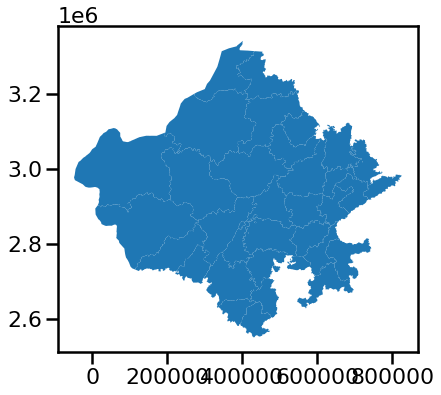

In [9]:
# simple example plot
shp_file.plot(figsize=(9, 6))

### Mapping

Often we need to observe relationship in maps. Below is a heat map function based on a column in the data frame

In [10]:
# define a map function for your requirements

def make_map(
    df,
    colname,
    title,
    name_file,
    location,
    figsize=(30, 20),
    color_scale="YlOrRd",
    color_max=None,
    color_min=None,
    save_path=None,
    maxmin=True,
):
    # some formatting
    font = {
        "family": "serif",
        "color": "black",
        "weight": "normal",
        "size": 14,
    }

    # create figure
    fig, ax = plt.subplots(figsize=figsize, facecolor="white")

    if color_max == None:
        max_val = max(abs(df[colname].max()), abs(df[colname].min()))
        color_min, color_max = -max_val, max_val

    # add the colorbar to the figure
    sm = plt.cm.ScalarMappable(
        cmap=color_scale, norm=plt.Normalize(vmin=color_min, vmax=color_max)
    )
    fig.colorbar(sm, orientation="horizontal", fraction=0.03, pad=0.02, aspect=20)
    ax.figure.axes[1].tick_params(labelsize=14)

    # Plotting function -- from geopandas
    ax = df.plot(
        column=colname,
        cmap=color_scale,
        edgecolor="face",
        norm=mpl.colors.Normalize(vmin=color_min, vmax=color_max),
        ax=ax,
    )
    
    # more formatting
    fig.text(0.5, 0.08, title, ha="center", va="center", rotation=0, fontsize=18)

    # annotate
    ax.set_axis_off()
    if maxmin == True:
        plt.annotate(
            text=f"min: {df[colname].min()}, max: {df[colname].max()}",
            xy=location,
            xycoords="axes fraction",
            fontsize=10,
        )

    #
    if save_path != None:
        os.makedirs(output_dir, exist_ok=True)
        # fig.savefig(f"{output_dir}/{name_file}", dpi=200, bbox_inches="tight")

In [11]:
# run the function
make_map(
    df=shp_file,
    colname='',
    title="",
    name_file='',
    location=(0.35, -0.2),
    figsize=(30, 15),
    color_scale="Spectral_r",
    color_max=shp_file.<colname>.max().values.item(),
    color_min=shp_file.<colname>.min().values.item(),
    save_path=f"{output_dir}",
    maxmin=True,
)

SyntaxError: invalid syntax (3499337793.py, line 10)

#### Suppose you want to make boundaries on a certain region that satisfies some condition. Jaisalmer is the district with largest area in Rajasthan. Let's add a boundary around Jaisalmer

In [12]:
# map function again, but with a slight change 

def make_map(
    df,
    colname,
    title,
    name_file,
    location,
    figsize=(30, 15),
    color_scale="YlOrRd",
    color_max=None,
    color_min=None,
    save_path=None,
    maxmin=True,
):
    # some formatting
    font = {
        "family": "serif",
        "color": "black",
        "weight": "normal",
        "size": 14,
    }

    # create figure
    fig, ax = plt.subplots(figsize=figsize, facecolor="white")

    if color_max == None:
        max_val = max(abs(df[colname].max()), abs(df[colname].min()))
        color_min, color_max = -max_val, max_val

    # add the colorbar to the figure
    sm = plt.cm.ScalarMappable(
        cmap=color_scale, norm=plt.Normalize(vmin=color_min, vmax=color_max)
    )
    fig.colorbar(sm, orientation="horizontal", fraction=0.03, pad=0.02, aspect=20)
    ax.figure.axes[1].tick_params(labelsize=14)

    # Plotting function -- from geopandas
    ax = df.plot(
        column=colname,
        cmap=color_scale,
        edgecolor="face",
        norm=mpl.colors.Normalize(vmin=color_min, vmax=color_max),
        ax=ax,
    )
    
    # this line here adds a thick border around the region you want
    df2.plot(ax=ax, linewidth=3, edgecolor='black')
    
    # more formatting
    fig.text(0.5, 0.08, title, ha="center", va="center", rotation=0, fontsize=18)

    # annotate
    ax.set_axis_off()
    if maxmin == True:
        plt.annotate(
            text=f"min: {df[colname].min()}, max: {df[colname].max()}",
            xy=location,
            xycoords="axes fraction",
            fontsize=10,
        )

    #
    if save_path != None:
        os.makedirs(output_dir, exist_ok=True)
        # fig.savefig(f"{output_dir}/{name_file}", dpi=200, bbox_inches="tight")

In [13]:
# make map
ir=['JAISALMER']
outline = shp_file[shp_file['DIST_NAME'].isin(ir)]

make_map(
    df=map,
    df2=outline,
    colname='',
    title="",
    name_file='',
    location=(0.35, -0.2),
    figsize=(30, 15),
    color_scale="Spectral_r",
    color_max=shp_file.<colname>.max().values.item(),
    color_min=shp_file.<colname>.min().values.item(),
    save_path=f"{output_dir}",
    maxmin=True,
)

SyntaxError: invalid syntax (2180820575.py, line 14)